In [124]:

import torch
from competence_estimation.metrics import compute_metric
from competence_estimation.utils import load_data

import time
import  matplotlib.pyplot as  plt
import numpy as np

import pickle
results =  {}
results_scores = {}
with open('results/results.pickle', 'rb') as handle:
    results = pickle.load(handle)
    
with open('results/results_scores.pickle', 'rb') as handle:
    results_scores = pickle.load(handle)
print('keys' ,  results.keys())

datasets = [ 'PACS','OfficeHome','TerraIncognita', 'VLCS', 'DomainNet']
algorithms=['ERM', 'Clip_Nonlinear' ,'SD', 'Mixup']#, 'SagNet',  'SwinTransformer', 'Fish', 'VisionTransformer', 'GroupDRO' ]

score_functions=[ 'vim','max_softmax', 'knn', 'max_logit', 'energy', 'energy_react', 'HBOS',      'GMM']#,'HBOS']

percentages = [0.0]#, 0.05, 0.1,0.15, 0.2, 0.25]


ENVS_DIC = {'OfficeHome':4, 'VLCS':4, 'PACS': 4, 'TerraIncognita': 4, 'SVIRO':10, 'DomainNet': 6}

data_dir ="/home/tarkus/Desktop/WILDS/paper_2022/train_classifiers/DomainBed/features"

# Directory of Model weights
model_dir = data_dir

keys dict_keys(['knn', 'max_softmax', 'vim', 'energy', 'GMM', 'energy_react', 'HBOS', 'mahalanobis', 'PCA', 'max_logit'])


In [125]:
import seaborn as sns
import pandas as pd
%matplotlib inline


d = {}

d['score_function'] = []
d['dataset'] = []
d['algorithm'] = []
d['test_domain'] = []
d['acc_drop']  = []
d['percentage'] = []
p=0.0

for k in  results[score_functions[0]][datasets[0]][algorithms[0]][0][percentages[0]].keys():
    d[k] = []
    print(k)

d['ausc_alpha_ood_shifted_mean'] = []#.append(result['ausc_alpha_ood_test_shifted'])
d['ausc_fracs_shifted_mean'] = []#.append(result['ausc_fracs_ood_test_shifted'])

d['ausc_ece_ood_alpha_shifted_mean'] = []#.append(result['ausc_alpha_ece_ood_test_shifted'])
d['ausc_ece_ood_fracs_shifted_mean'] = []#.append(
d['vim_dist'] = []#.append(

for p in percentages:

    for dataset in datasets:
        for test_domain in  range(ENVS_DIC[dataset]):
            
            mean_fracs = 0
            mean_alpha = 0
            mean_ece = 0
            mean_ece_fracs = 0

            for algorithm in algorithms:
                
                for score_function_name in score_functions:
                    
                    result = results[score_function_name][dataset][algorithm][test_domain][p]#(results[conf_key][score_function][dataset][alg_cons][test_domain][p]

                    d['dataset'].append(dataset)
                    d['algorithm'].append(algorithm)
                    d['test_domain'].append(test_domain)

                    d['percentage'].append(p)
                    
                    d['score_function'].append(score_function_name)
                    for k in  results[score_function_name][dataset][algorithm][test_domain][p].keys():
                        d[k].append(result[k])
             
                    d['acc_drop'].append(result['acc_ood_test']-result['acc_iid_test'] )
                    
                    mean_alpha += d['ausc_alpha_ood_test_shifted'][-1]
                    mean_ece += d['ausc_alpha_ece_ood_test_shifted'][-1]
                    mean_fracs += d['ausc_fracs_ood_test_shifted'][-1]
                    mean_ece_fracs += d['ausc_fracs_ece_ood_test_shifted'][-1]

                    d['ausc_alpha_ood_shifted_mean'].append(result['ausc_alpha_ood_test_shifted'])
                    d['ausc_fracs_shifted_mean'].append(result['ausc_fracs_ood_test_shifted'])

                    d['ausc_ece_ood_alpha_shifted_mean'].append(result['ausc_alpha_ece_ood_test_shifted'])
                    d['ausc_ece_ood_fracs_shifted_mean'].append(result['ausc_fracs_ece_ood_test_shifted'])
                    
                    if score_function_name == 'vim':
                        tmp_vim = result['ausc_alpha_ood_test_shifted'] 
                    d['vim_dist'].append(result['ausc_alpha_ood_test_shifted'] -tmp_vim)
                    
                mean_alpha /=len(score_functions)
                mean_ece /=len(score_functions)
                mean_fracs /=len(score_functions)
                mean_ece_fracs /= len(score_functions)
                for e, _ in enumerate(score_functions):
                    d['ausc_alpha_ood_shifted_mean'][-e-1] -= mean_alpha
                    d['ausc_ece_ood_alpha_shifted_mean'][-e-1] -= mean_ece
                    d['ausc_fracs_shifted_mean'][-e-1] -= mean_fracs
                    d['ausc_ece_ood_fracs_shifted_mean'][-e-1] -= mean_ece_fracs

            #print(mean)    
            
df = pd.DataFrame(data=d)
print(len(df))

acc_ood_test
acc_iid_test
acc_iid_val
ece_ood_test
ece_iid_test
ece_iid_val
ausc_alpha_ece_ood_test
ausc_alpha_ece_iid_test
ausc_alpha_ece_ood_test_shifted
ausc_alpha_ece_iid_test_shifted
ausc_fracs_ece_ood_test
ausc_fracs_ece_iid_test
ausc_fracs_ece_ood_test_shifted
ausc_fracs_ece_iid_test_shifted
ausc_alpha_ood_test
ausc_alpha_iid_test
ausc_alpha_ood_test_shifted
ausc_alpha_iid_test_shifted
ausc_fracs_ood_test
ausc_fracs_iid_test
ausc_fracs_ood_test_shifted
ausc_fracs_iid_test_shifted
intersection_fraction_ood_test
intersection_alpha_ood_test
intersection_fraction_iid_test
intersection_alpha_iid_test
frac_remaining_ood_test
frac_remaining_iid_test
704


In [94]:
df['vim_dist']

0      0.000000
1     -0.006214
2     -0.008589
3     -0.008867
4     -0.002653
         ...   
555   -0.002823
556   -0.003702
557    0.004118
558   -0.050750
559   -0.223953
Name: vim_dist, Length: 560, dtype: float64

# Sanity Checks

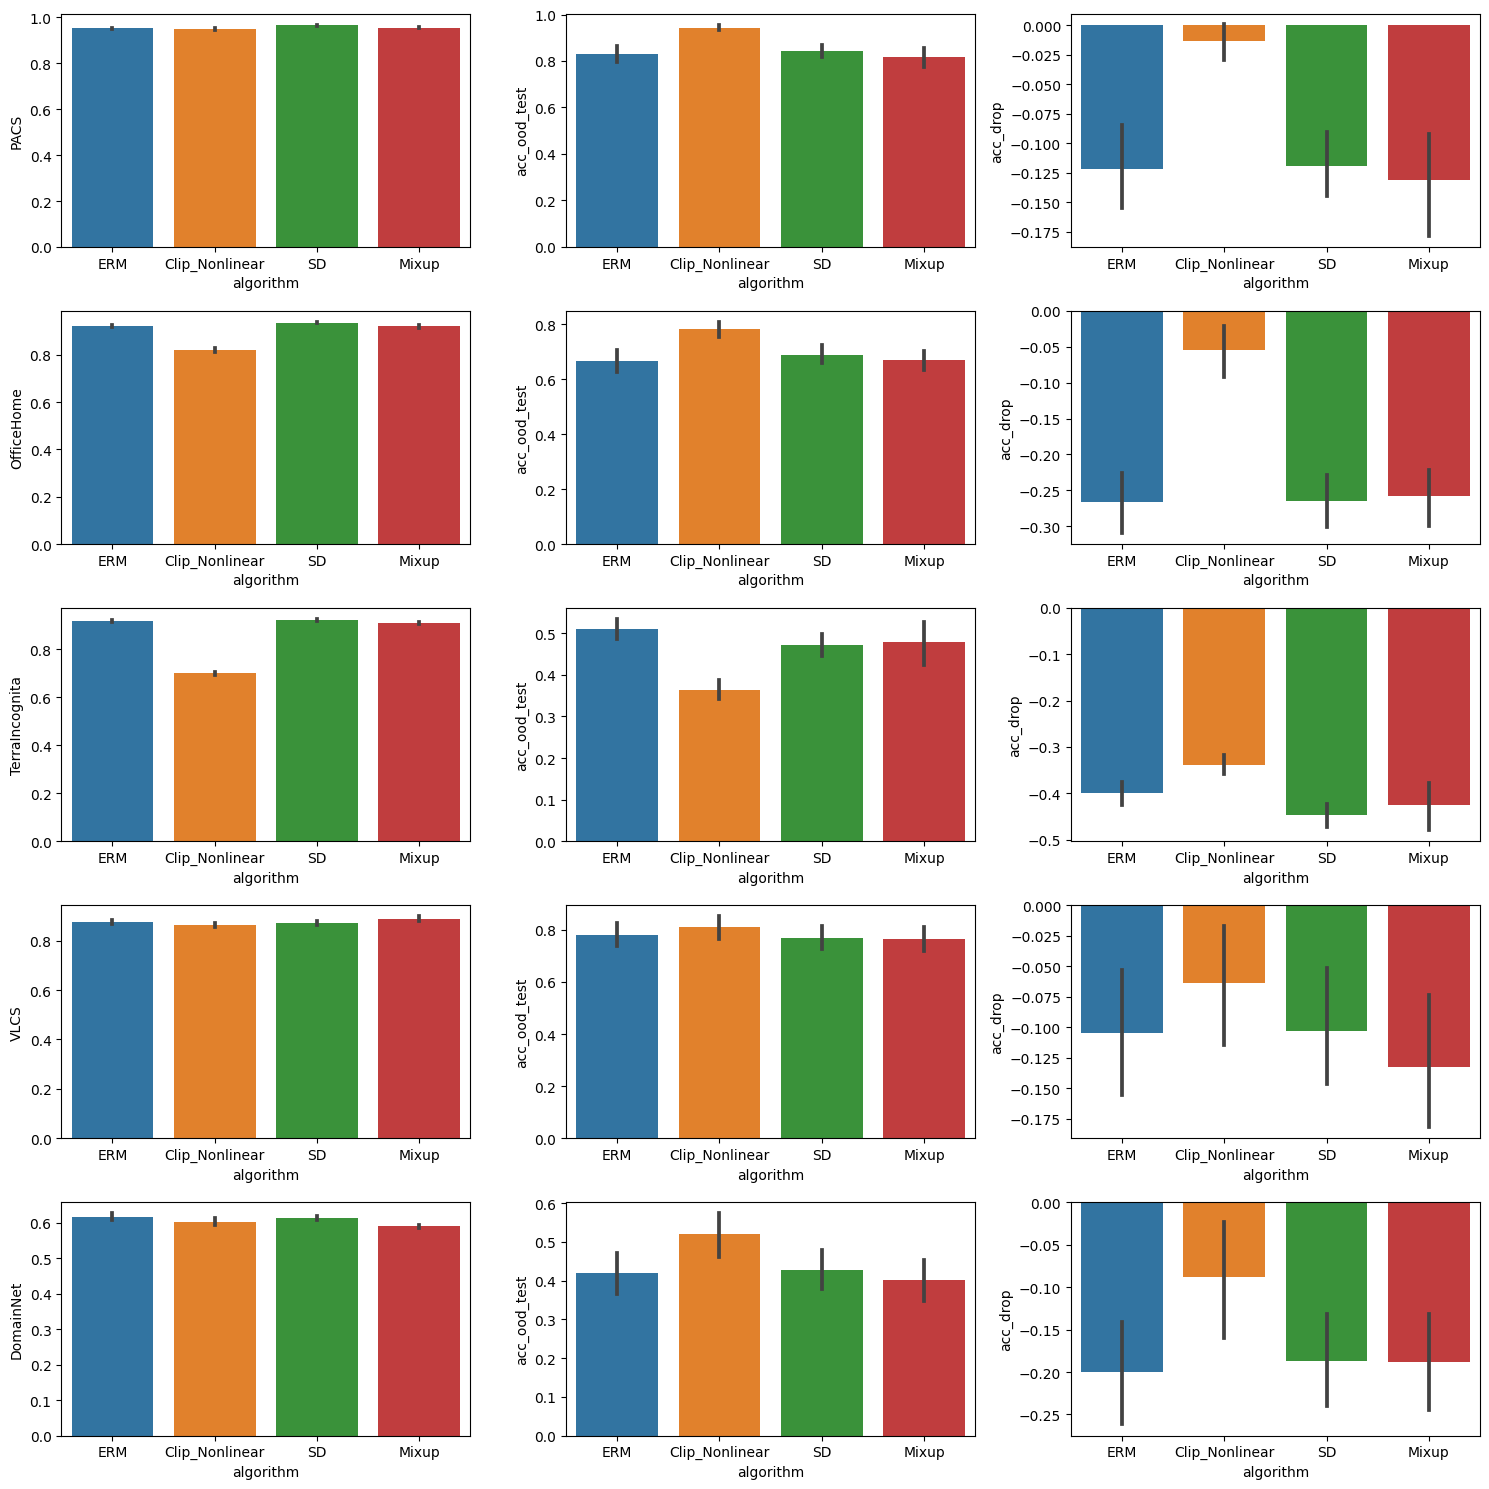

In [126]:
fig, ax = plt.subplots(len(datasets), 3,
    figsize =(15, 15),
    tight_layout = True)

for e, dataset in enumerate(datasets):
    df_sub = df[df['dataset']== dataset]
    sns.barplot(data=df_sub, y='acc_iid_val', x='algorithm', ax=ax[e,0])
    sns.barplot(data=df_sub, y='acc_ood_test', x='algorithm', ax=ax[e,1])
    sns.barplot(data=df_sub, y='acc_drop', x='algorithm', ax=ax[e,2])

    ax[e,0].set_ylabel(dataset)
#sns.barplot(data=df, y='acc_ood_test', x='algorithm', ax=ax[1,0])
#sns.barplot(data=df, y='acc_ood_test', x='dataset', ax=ax[1,1])

# AUSC ALPHA

Text(0.5, 1.0, 'AUSC Alpha')

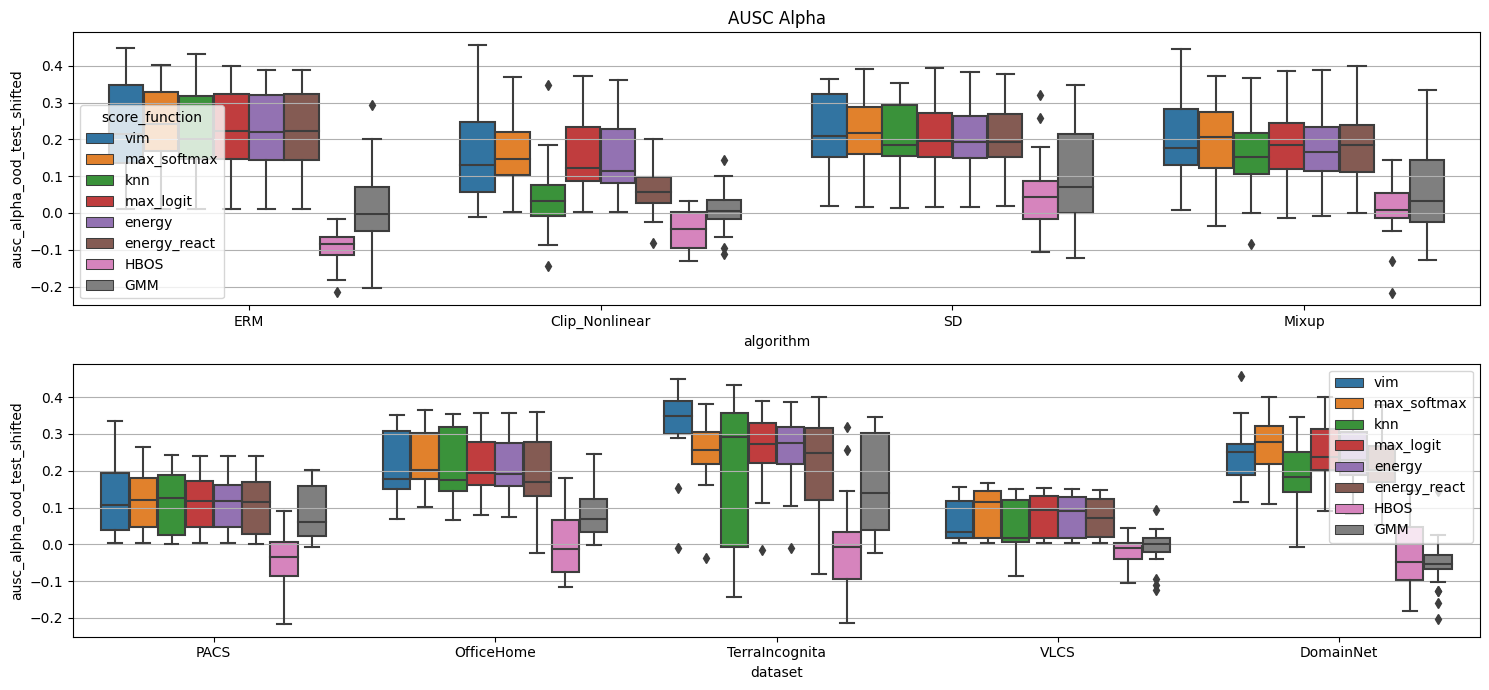

In [138]:
fig, ax = plt.subplots(2, 1,
    figsize =(15, 7),
    tight_layout = True)

df = pd.DataFrame(data=d)


sns.boxplot(data=df, x="algorithm", y="ausc_alpha_ood_test_shifted", hue='score_function', ax=ax[0])
ax[0].grid(axis='y')

#sns.boxplot(data=df, x="algorithm", y="ausc_alpha_ood_test_shifted_mean", hue='score_function', ax=ax[1])
#ax[1].grid(axis='y')

sns.boxplot(data=df, x="dataset", y="ausc_alpha_ood_test_shifted", hue='score_function', ax=ax[1])
ax[1].grid(axis='y')
ax[1].legend()

#sns.boxplot(data=df, x="dataset", y="ausc_alpha_ood_test_shifted_mean", hue='score_function', ax=ax[3])
#ax[3].grid(axis='y')

ax[0].set_title("AUSC Alpha")

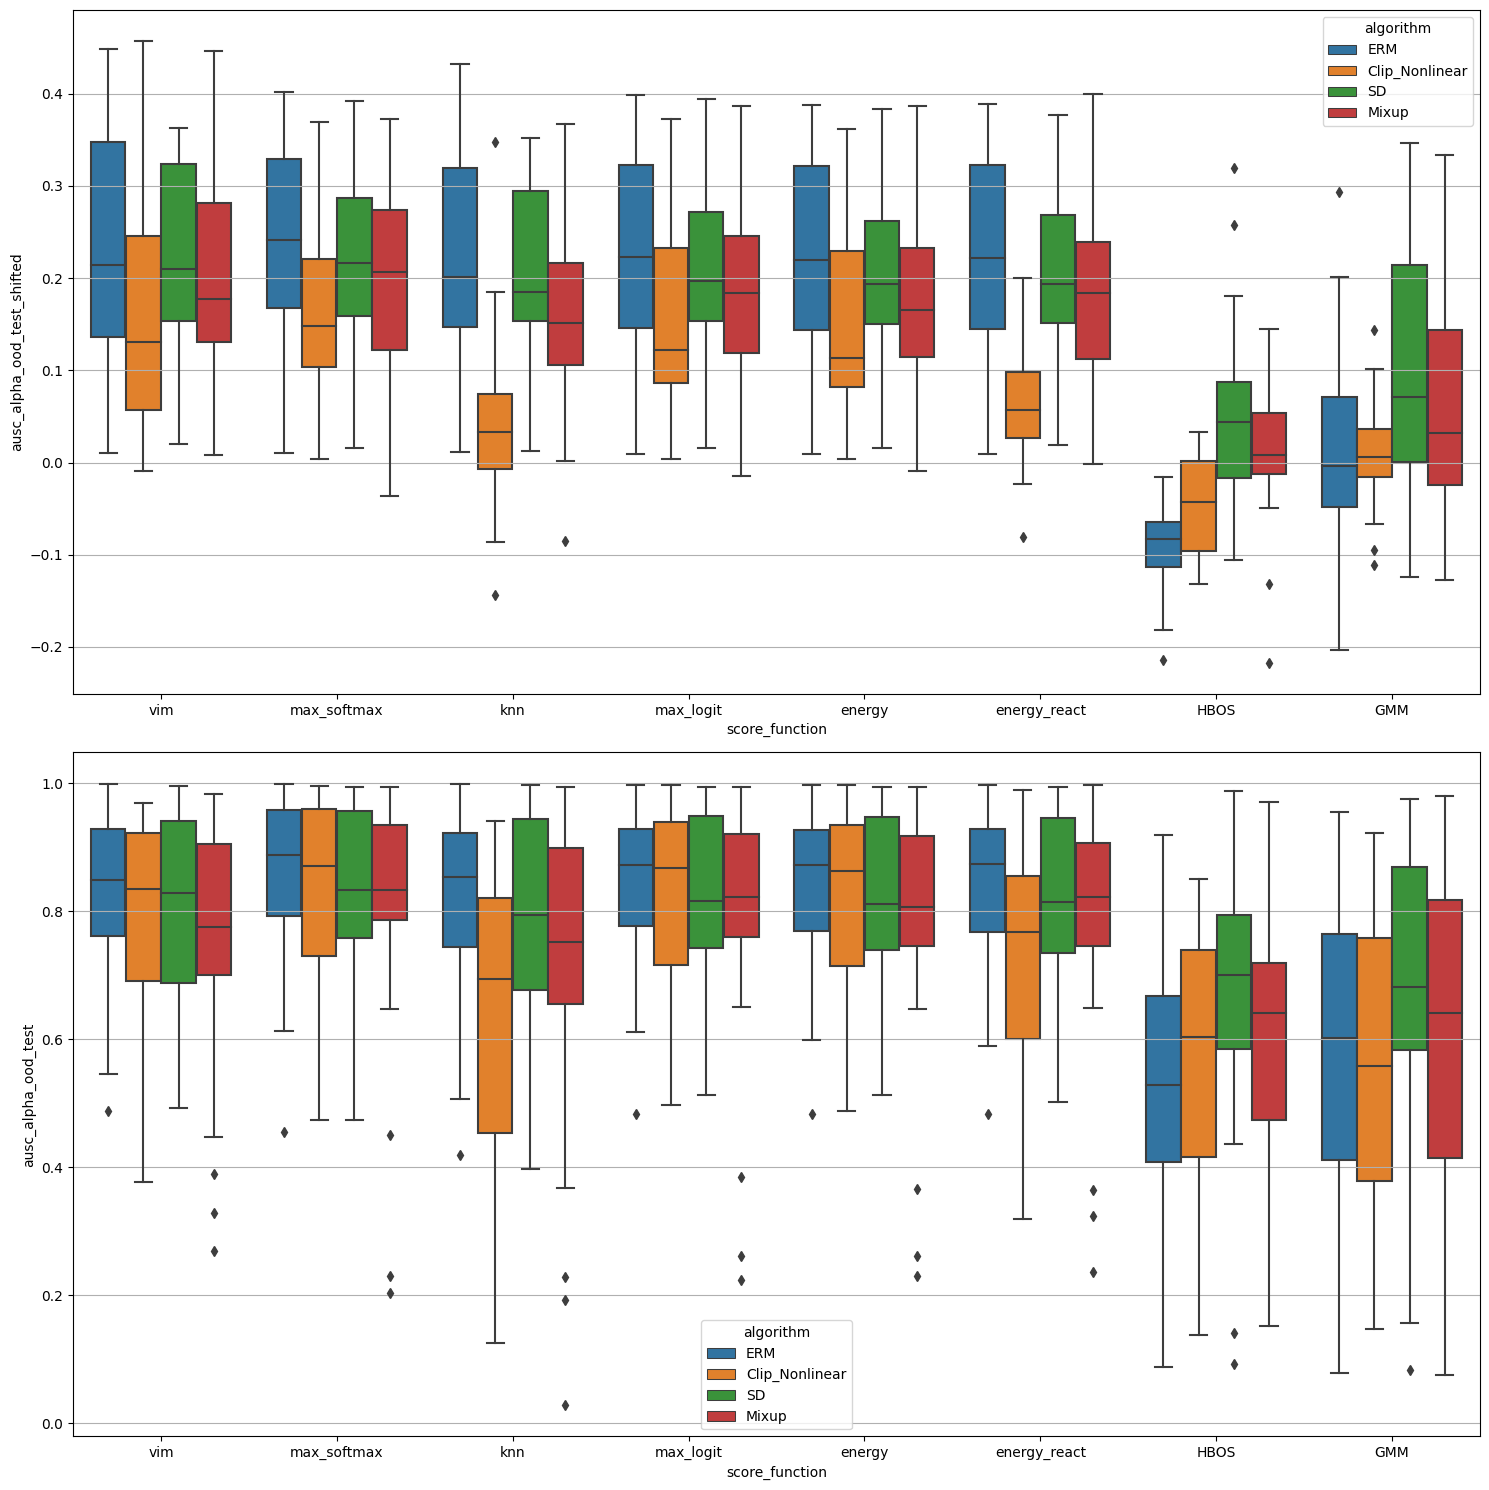

In [129]:
fig, ax = plt.subplots(2, 1,
    figsize =(15, 15),
    tight_layout = True)


sns.boxplot(data=df, x="score_function", y="ausc_alpha_ood_test_shifted", hue='algorithm', ax=ax[0])
ax[0].grid(axis='y')

#sns.boxplot(data=df, x="score_function", y="ausc_alpha_ood_shifted", hue='dataset', ax=ax[2])
#ax[1].grid(axis='y')

sns.boxplot(data=df, x="score_function", y="ausc_alpha_ood_test", hue='algorithm', ax=ax[1])
ax[1].grid(axis='y')

#sns.boxplot(data=df, x="score_function", y="ausc_ood_alpha", hue='dataset', ax=ax[3])
#ax[3].grid(axis='y')



## AUSC Fracs

Text(0.5, 1.0, 'AUSC Alpha')

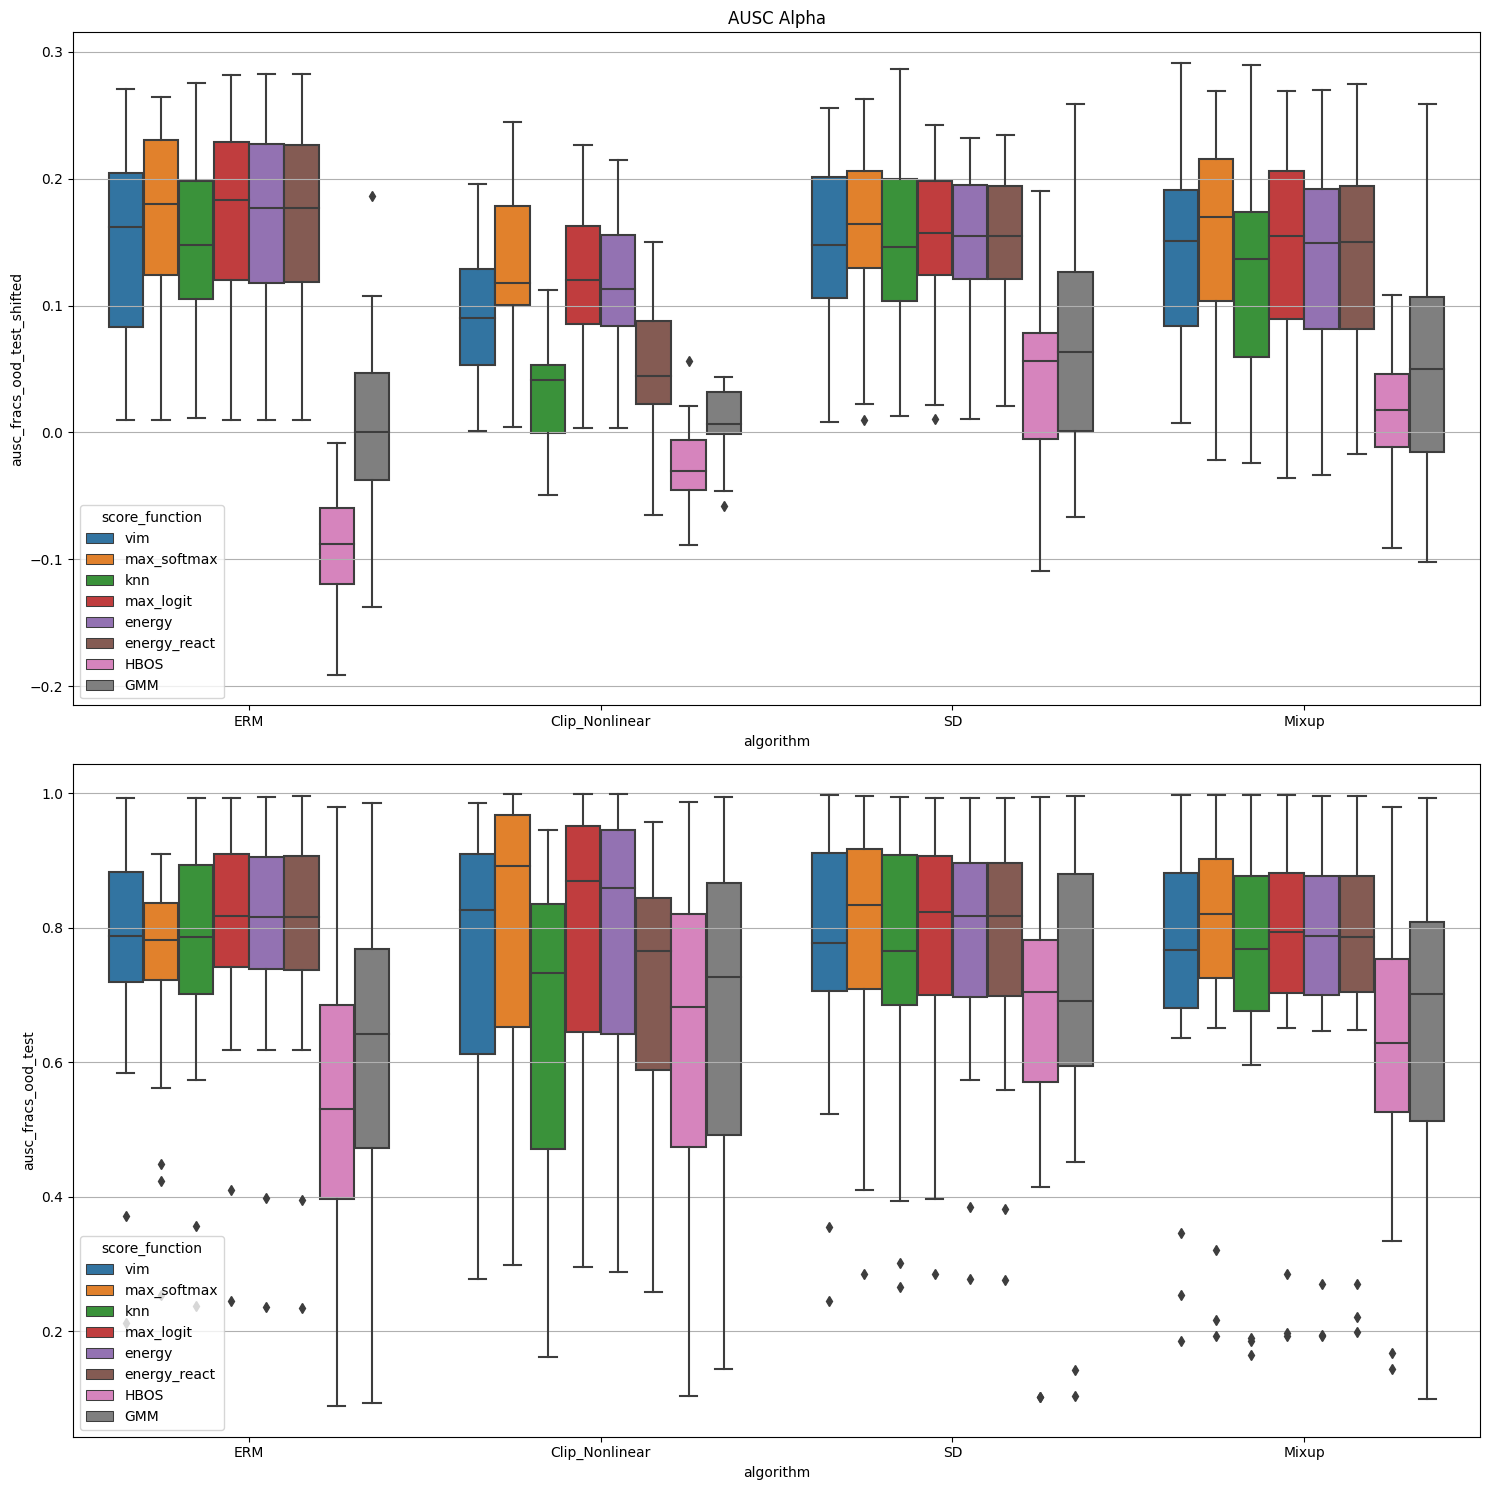

In [130]:
fig, ax = plt.subplots(2, 1,
    figsize =(15, 15),
    tight_layout = True)

df = pd.DataFrame(data=d)


sns.boxplot(data=df, x="algorithm", y="ausc_fracs_ood_test_shifted", hue='score_function', ax=ax[0])
ax[0].grid(axis='y')

sns.boxplot(data=df, x="algorithm", y="ausc_fracs_ood_test", hue='score_function', ax=ax[1])
ax[1].grid(axis='y')

#sns.boxplot(data=df, x="dataset", y="ausc_fracs_shifted", hue='score_function', ax=ax[1])
#ax[2].grid(axis='y')

#sns.boxplot(data=df, x="dataset", y="ausc_fracs_shifted_mean", hue='score_function', ax=ax[3])
#ax[3].grid(axis='y')

ax[0].set_title("AUSC Alpha")

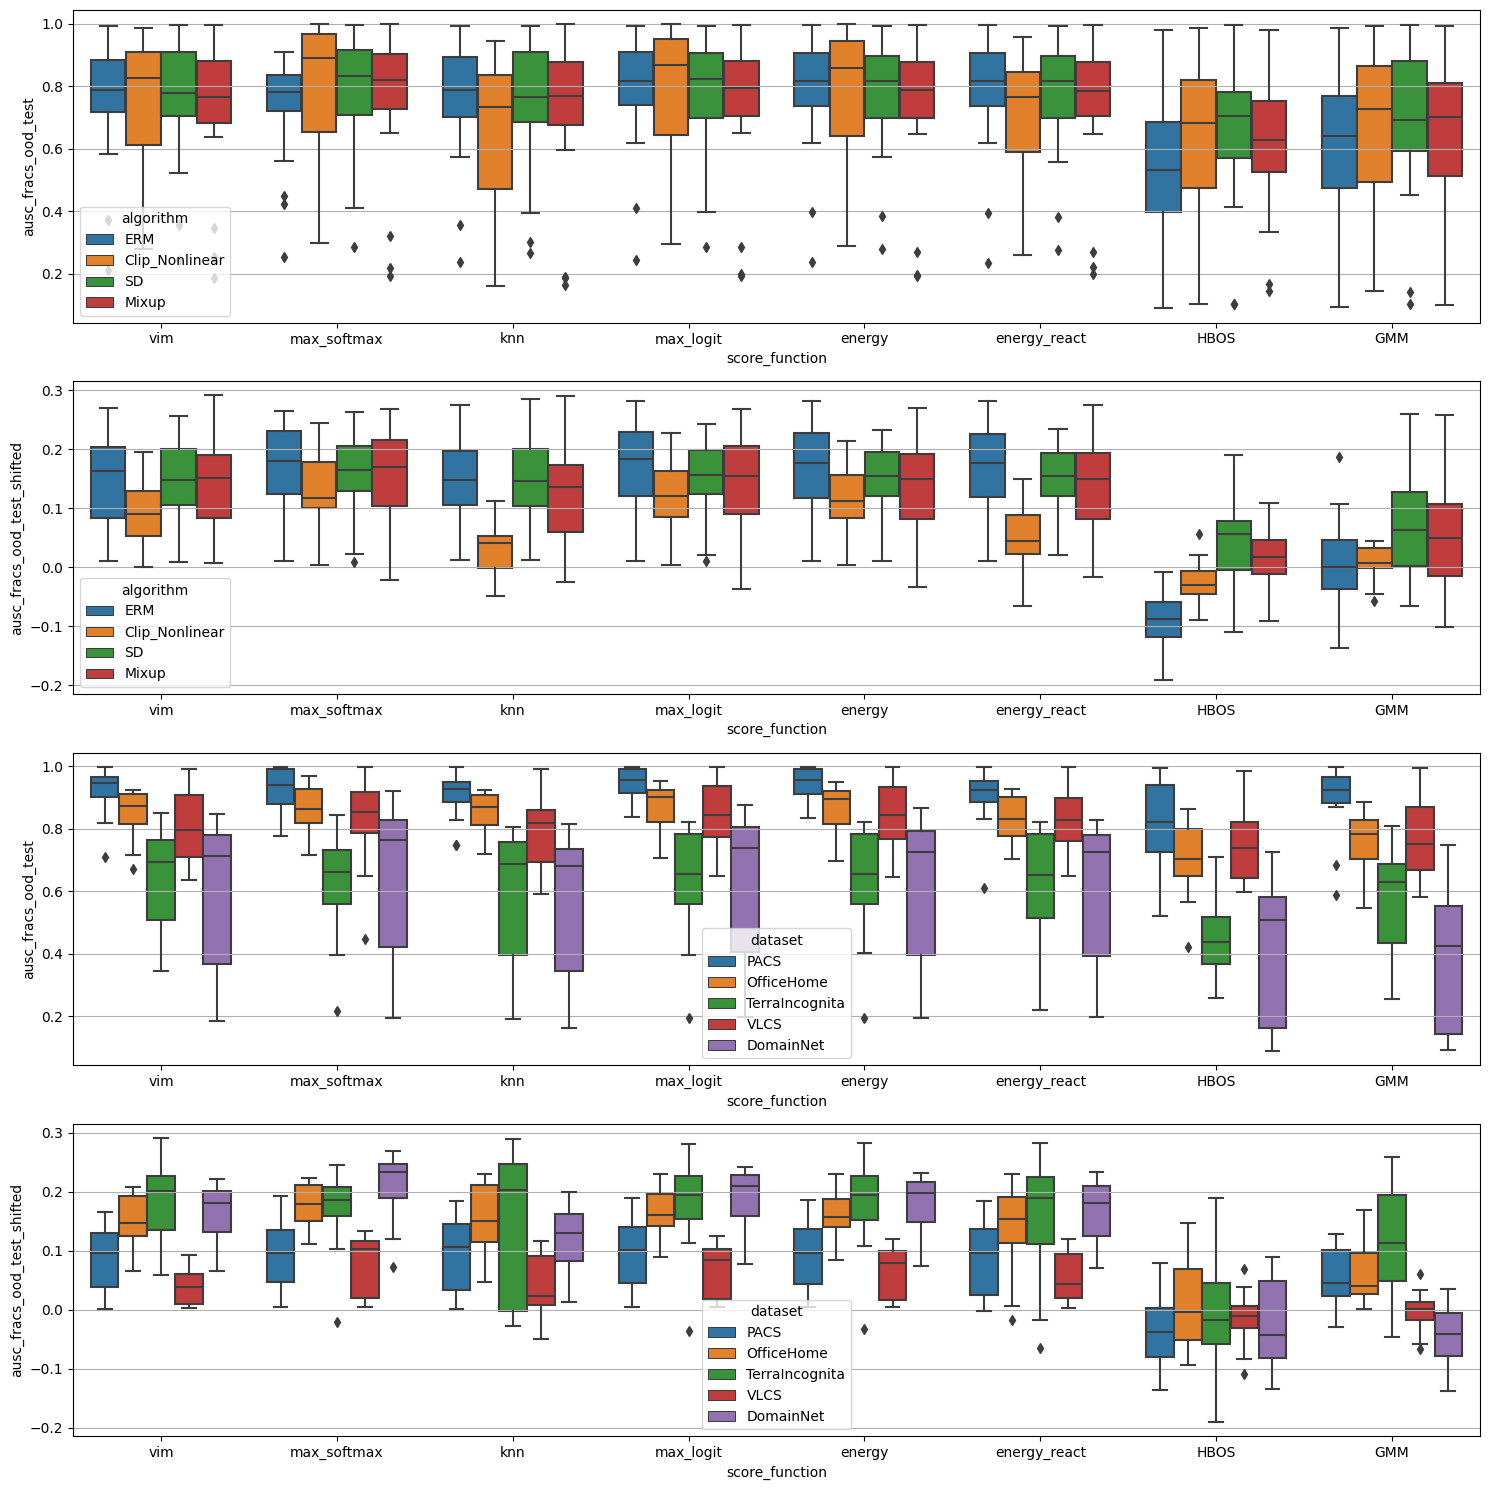

In [143]:
fig, ax = plt.subplots(4, 1,
    figsize =(15, 15),
    tight_layout = True)


sns.boxplot(data=df, x="score_function", y="ausc_fracs_ood_test", hue='algorithm', ax=ax[0])
ax[0].grid(axis='y')

sns.boxplot(data=df, x="score_function", y="ausc_fracs_ood_test", hue='dataset', ax=ax[2])
ax[1].grid(axis='y')

sns.boxplot(data=df, x="score_function", y="ausc_fracs_ood_test_shifted", hue='algorithm', ax=ax[1])
ax[2].grid(axis='y')

sns.boxplot(data=df, x="score_function", y="ausc_fracs_ood_test_shifted", hue='dataset', ax=ax[3])
ax[3].grid(axis='y')

# AUSC ECE Alpha and Fracs

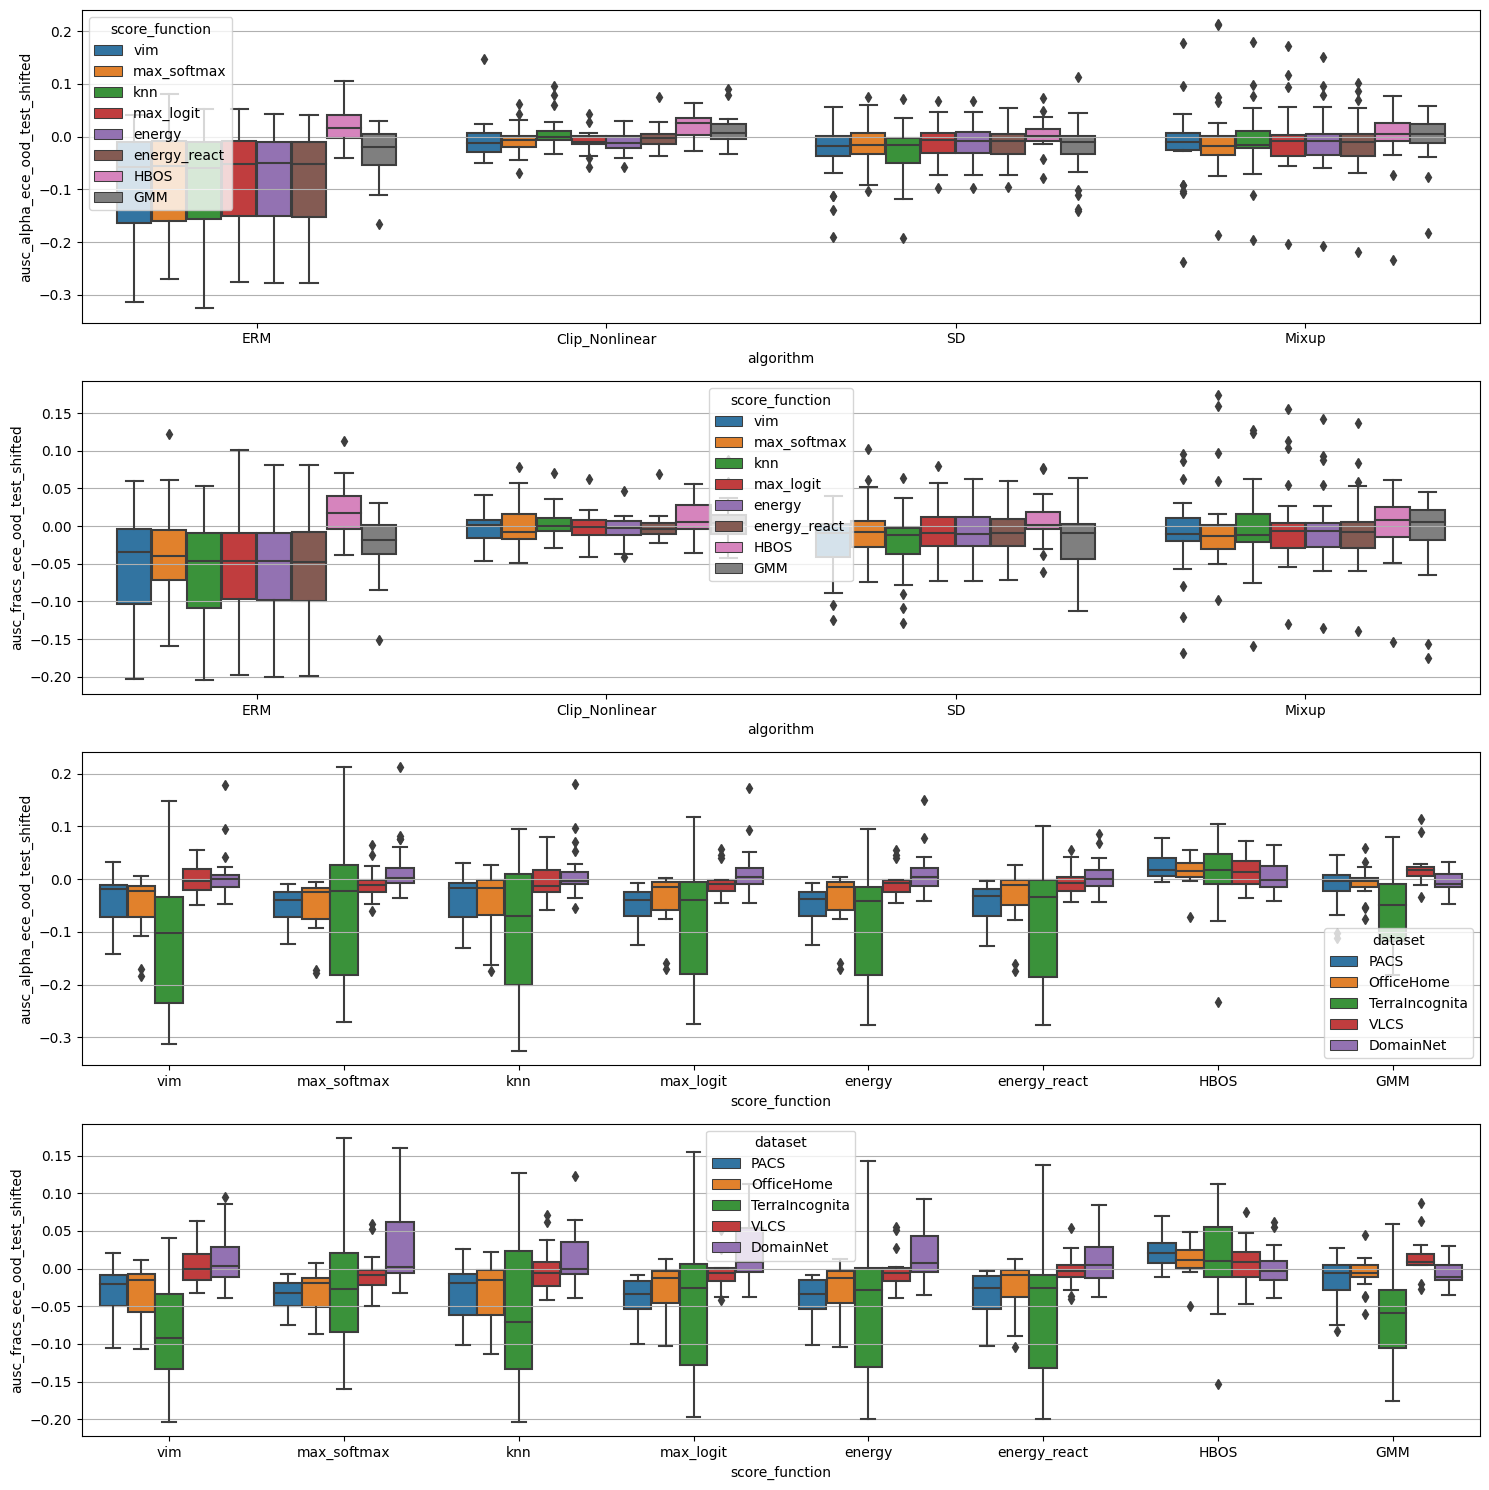

In [142]:
fig, ax = plt.subplots(4, 1,
    figsize =(15, 15),
    tight_layout = True)


sns.boxplot(data=df, x="algorithm", y="ausc_alpha_ece_ood_test_shifted", hue='score_function', ax=ax[0])
ax[0].grid(axis='y')

sns.boxplot(data=df, x="algorithm", y="ausc_fracs_ece_ood_test_shifted", hue='score_function', ax=ax[1])

sns.boxplot(data=df, x="score_function", y="ausc_alpha_ece_ood_test_shifted", hue='dataset', ax=ax[2])
ax[1].grid(axis='y')

ax[2].grid(axis='y')

sns.boxplot(data=df, x="score_function", y="ausc_fracs_ece_ood_test_shifted", hue='dataset', ax=ax[3])
ax[3].grid(axis='y')

# AUSC ECE Fracs

# IId Features

<AxesSubplot: xlabel='score_function', ylabel='ausc_alpha_ood_test'>

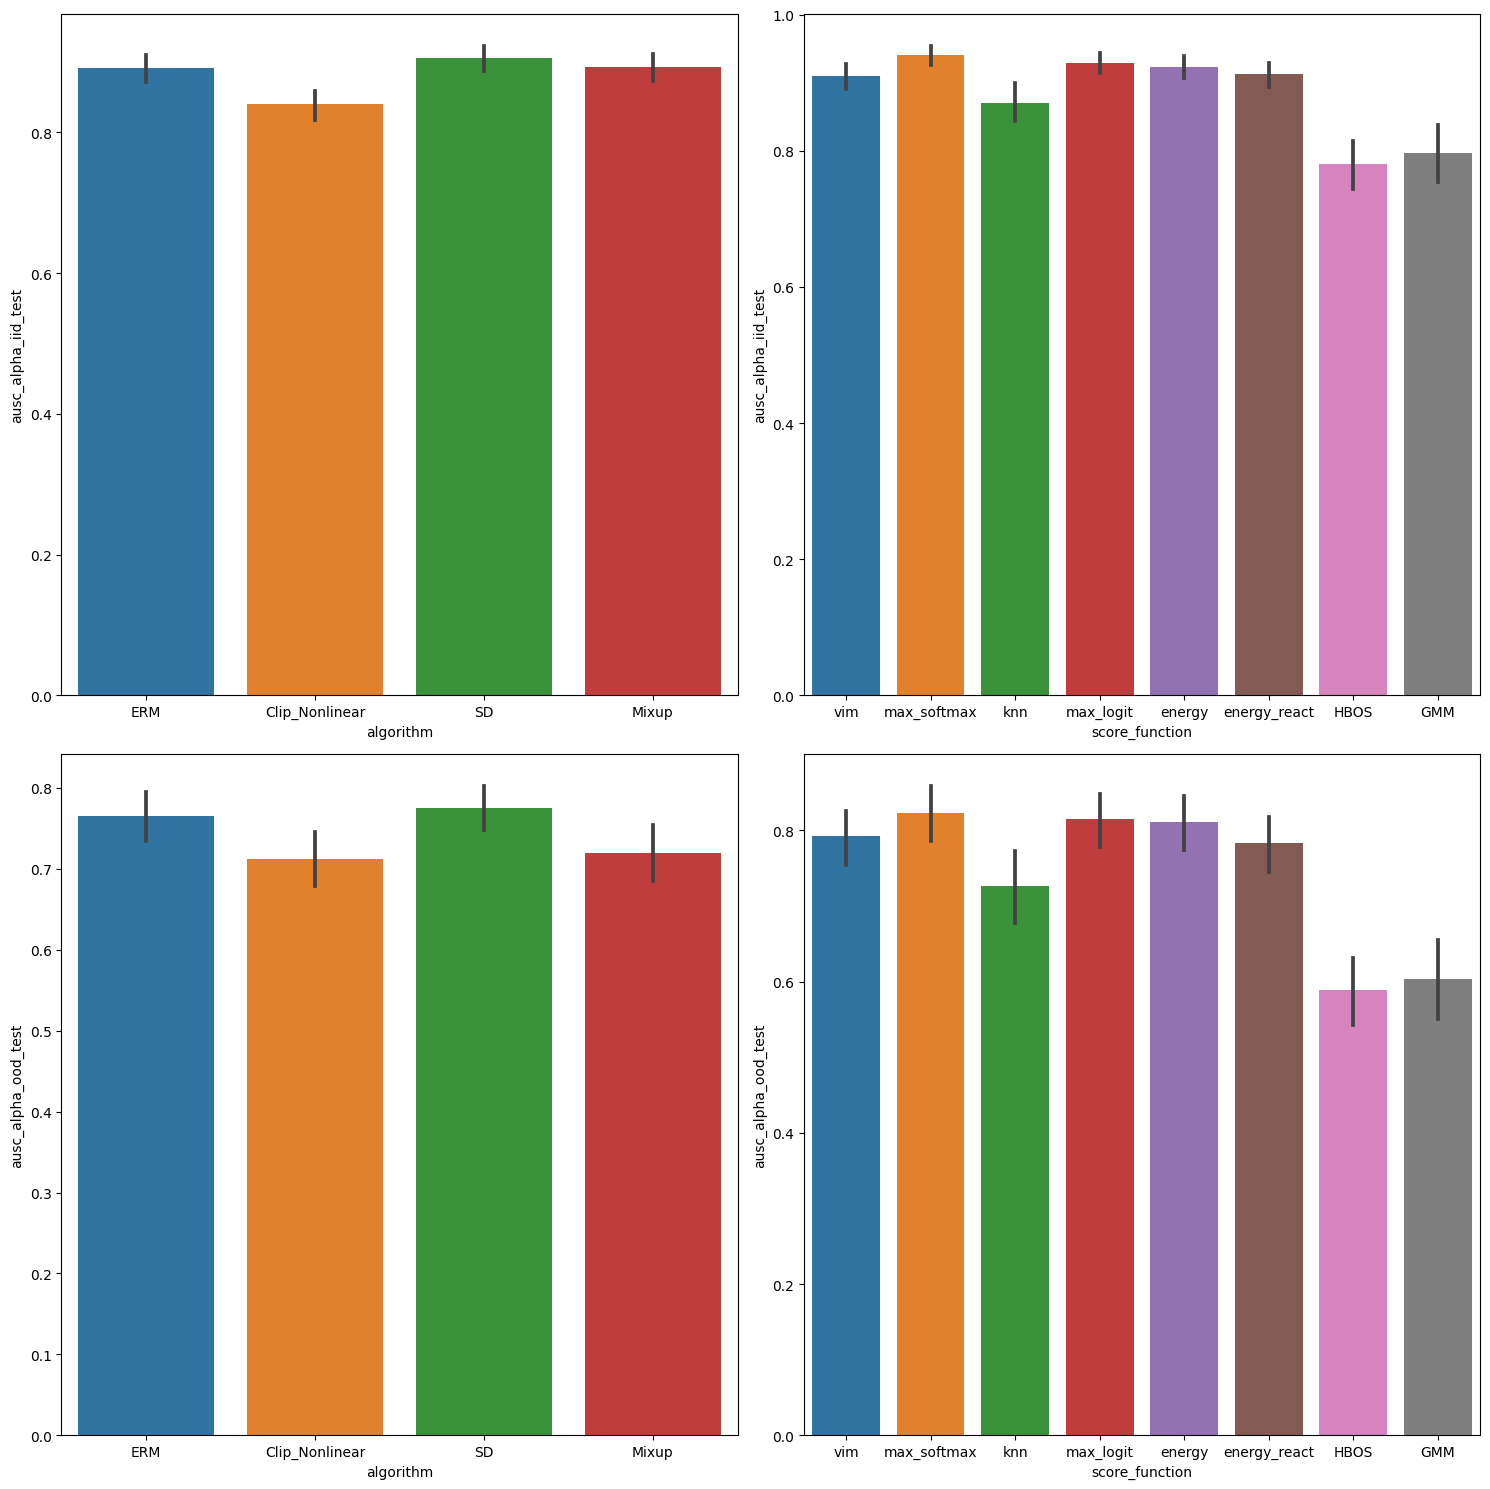

In [132]:
fig, ax = plt.subplots(2, 2,
    figsize =(15, 15),
    tight_layout = True)

sns.barplot(data=df, y='ausc_alpha_iid_test', x='algorithm', ax=ax[0,0])
sns.barplot(data=df, y='ausc_alpha_iid_test', x='score_function', ax=ax[0,1])

sns.barplot(data=df, y='ausc_alpha_ood_test', x='algorithm', ax=ax[1,0])
sns.barplot(data=df, y='ausc_alpha_ood_test', x='score_function', ax=ax[1,1])

<AxesSubplot: xlabel='score_function', ylabel='ausc_alpha_ood_test'>

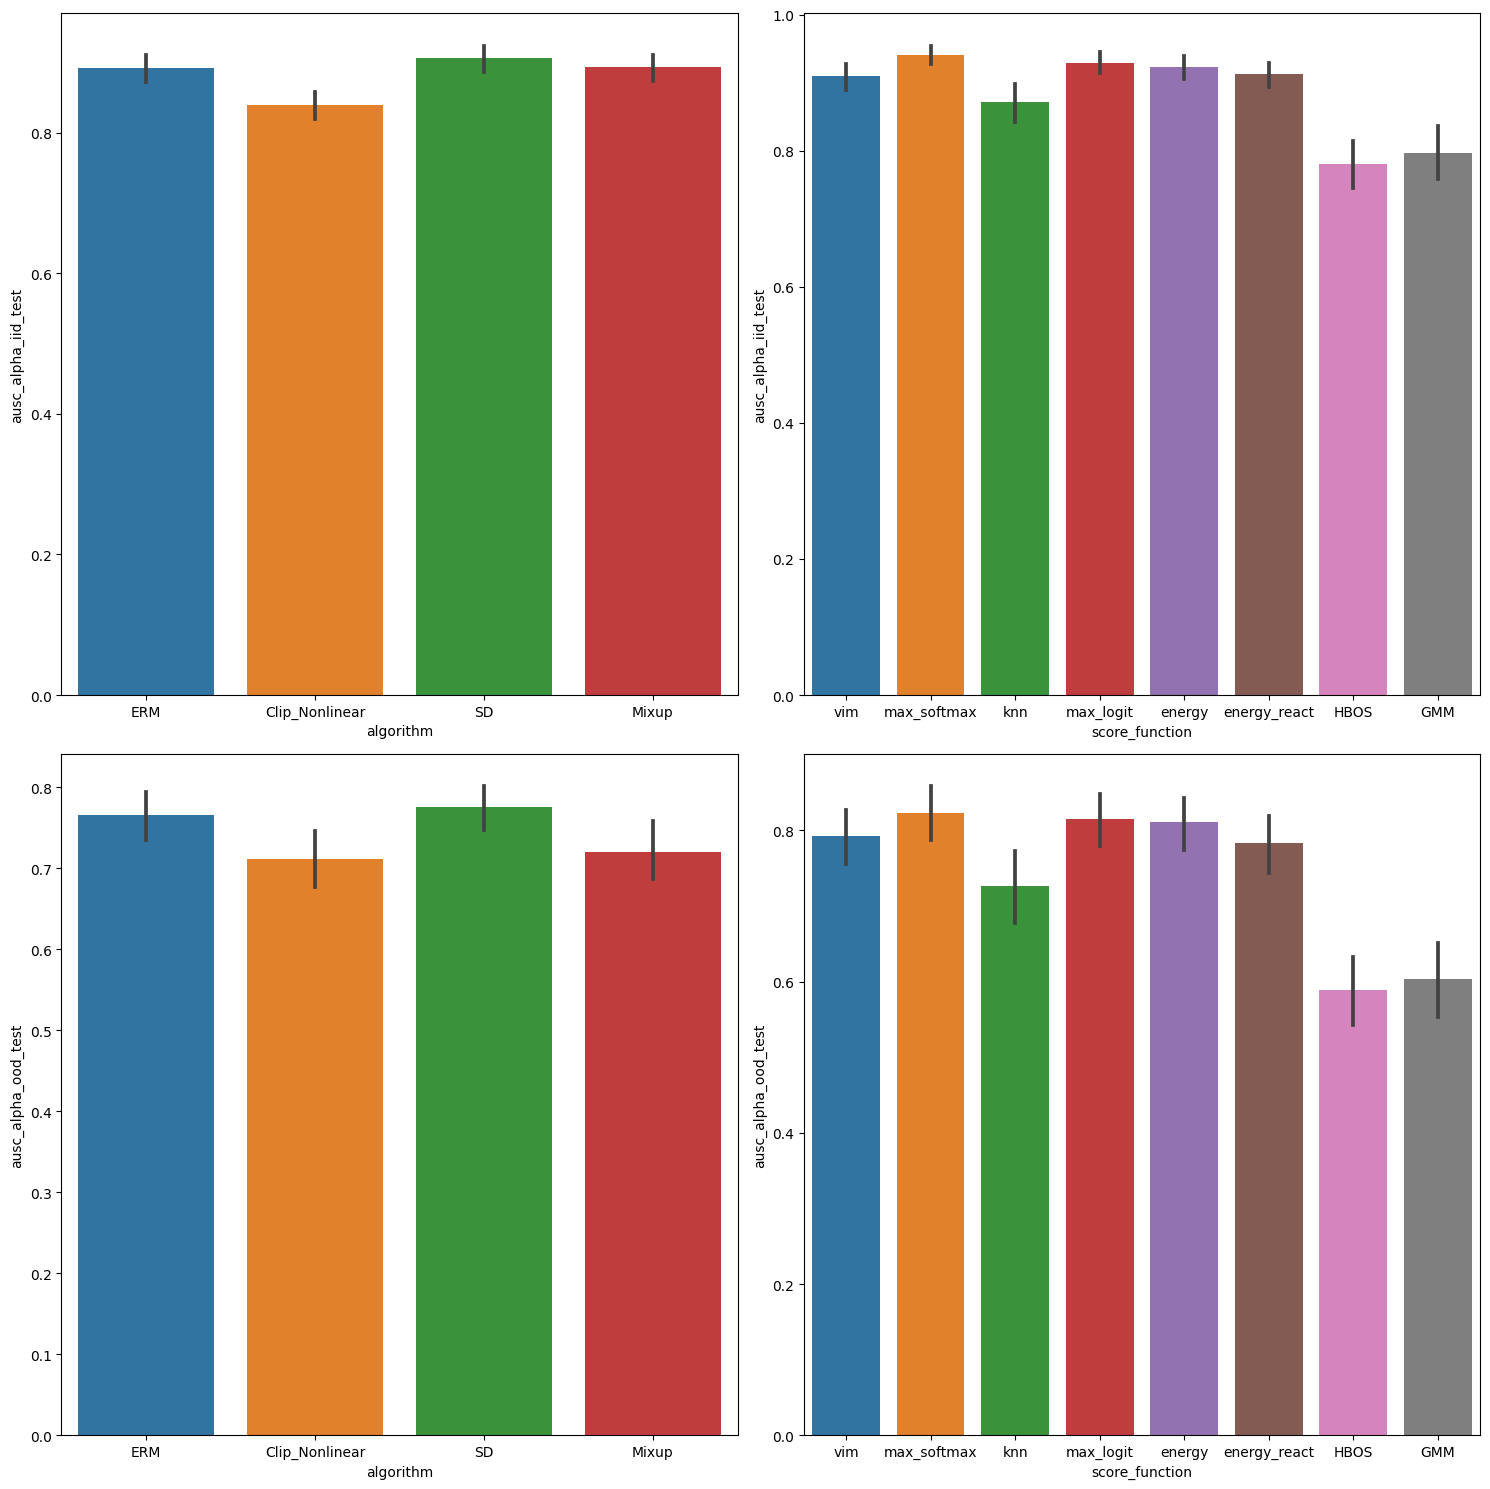

In [133]:
fig, ax = plt.subplots(2, 2,
    figsize =(15, 15),
    tight_layout = True)

sns.barplot(data=df, y='ausc_alpha_iid_test', x='algorithm', ax=ax[0,0])
sns.barplot(data=df, y='ausc_alpha_iid_test', x='score_function', ax=ax[0,1])

sns.barplot(data=df, y='ausc_alpha_ood_test', x='algorithm', ax=ax[1,0])
sns.barplot(data=df, y='ausc_alpha_ood_test', x='score_function', ax=ax[1,1])

In [134]:
## Which iid feature is  predictive for acc

<AxesSubplot: xlabel='acc_drop', ylabel='vim_dist'>

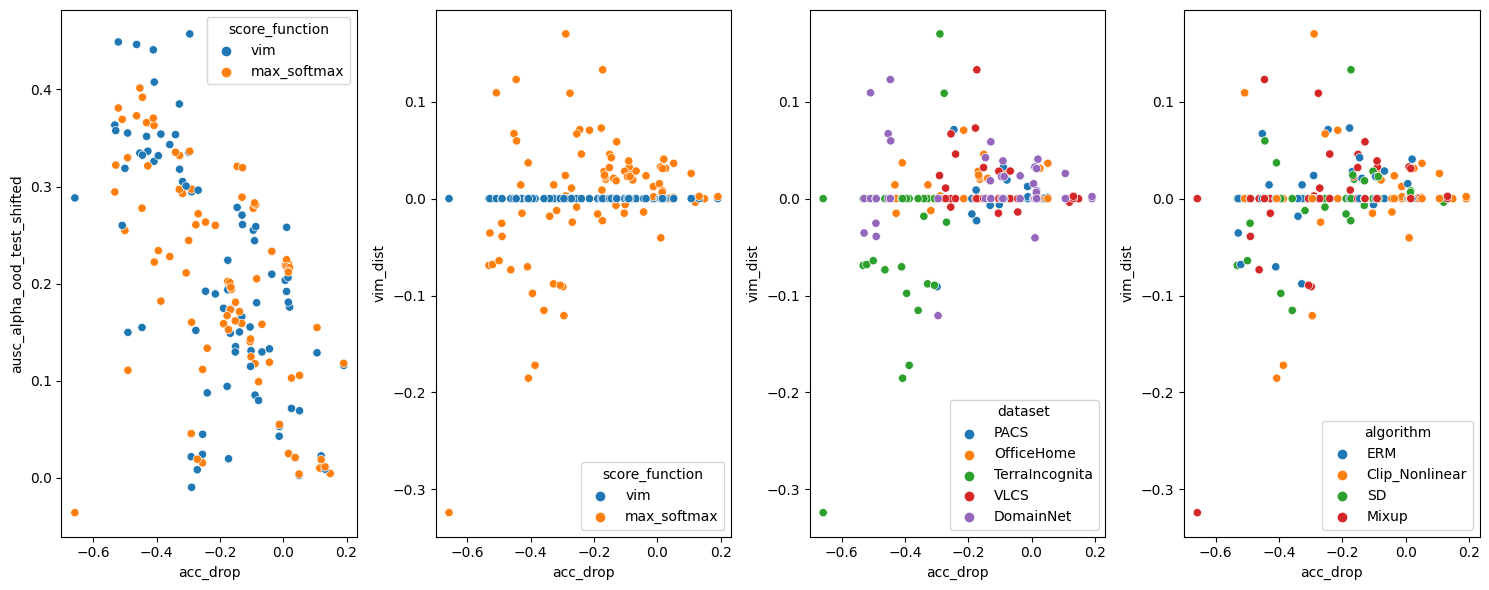

In [136]:
fig, ax = plt.subplots(1, 4,
    figsize =(15, 6),
    tight_layout = True)

df= df[df['score_function'].isin(['vim', 'max_softmax'])]
#print(df.columns)

sns.scatterplot(x="acc_drop", y="ausc_alpha_ood_test_shifted",data=df,  ax=ax[0], hue='score_function')
sns.scatterplot(x="acc_drop", y="vim_dist",data=df,  ax=ax[1], hue='score_function')
sns.scatterplot(x="acc_drop", y="vim_dist",data=df,  ax=ax[2], hue='dataset')
sns.scatterplot(x="acc_drop", y="vim_dist",data=df,  ax=ax[3], hue='algorithm')

ValueError: Could not interpret value `ausc_fracs_shifted` for parameter `y`

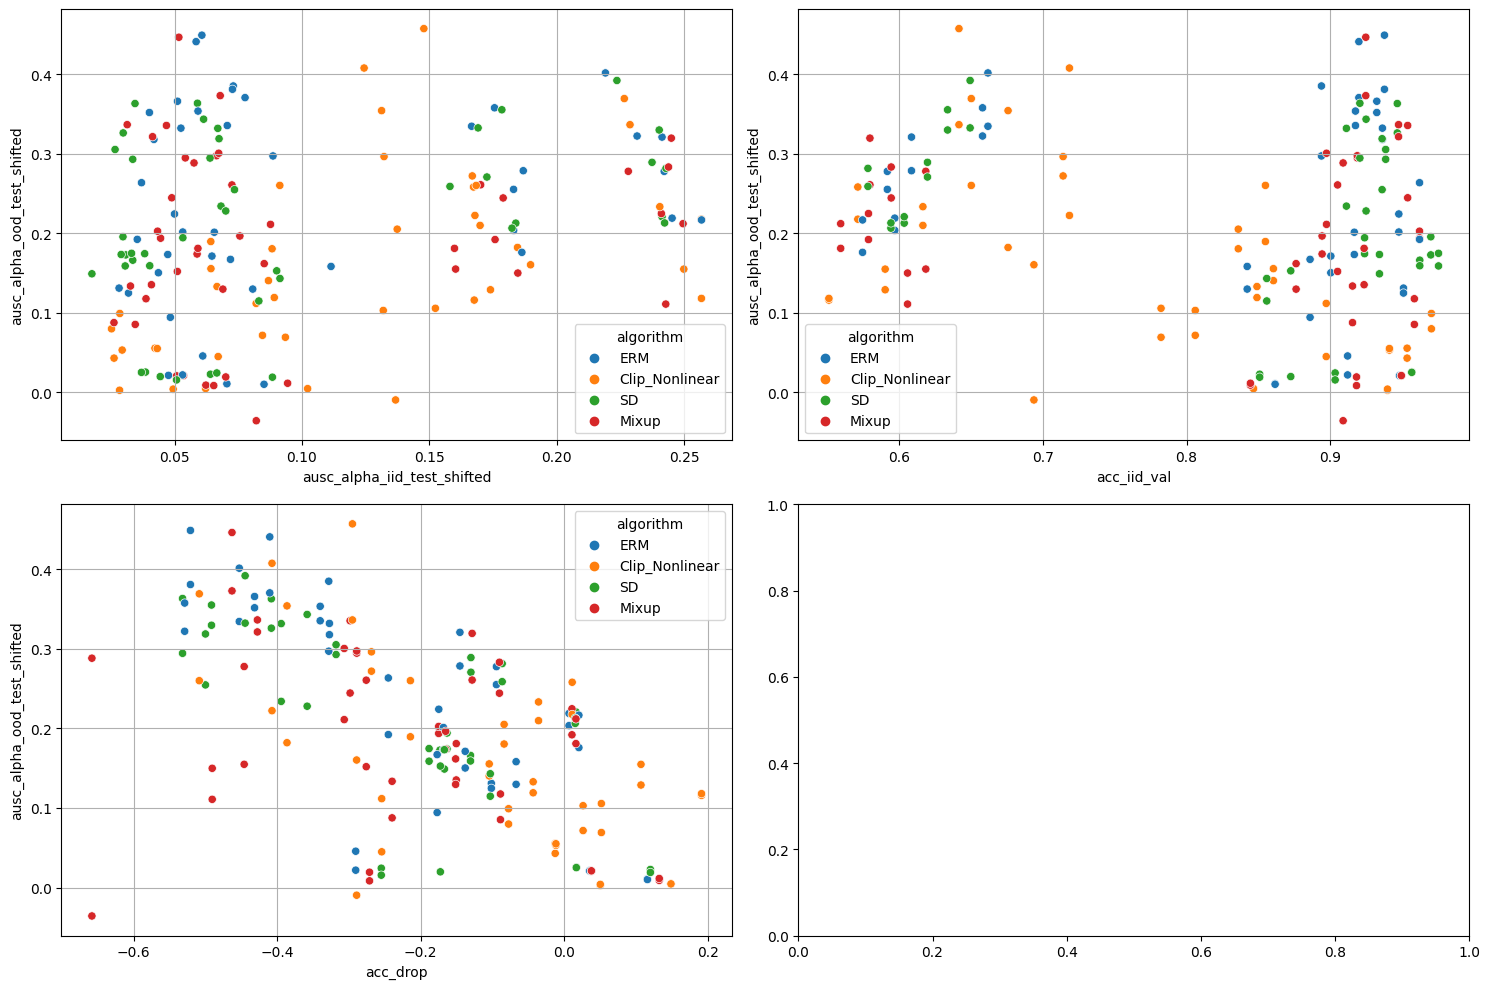

In [137]:
fig, ax = plt.subplots(2, 2,
    figsize =(15, 10),
    tight_layout = True)

#df= df[df['config']=='knn0']

sns.scatterplot(x="ausc_alpha_iid_test_shifted", y="ausc_alpha_ood_test_shifted",data=df,  ax=ax[0,0], hue='algorithm')
ax[0,0].grid()
sns.scatterplot(x="acc_iid_val", y="ausc_alpha_ood_test_shifted",data=df,  ax=ax[0,1], hue='algorithm')
ax[0,1].grid()


sns.scatterplot(x="acc_drop", y="ausc_alpha_ood_test_shifted",data=df,  ax=ax[1,0], hue='algorithm')
ax[1,0].grid()
sns.scatterplot(x="acc_drop", y="ausc_fracs_shifted",data=df,  ax=ax[1,1], hue='dataset')
ax[1,1].grid()



In [ ]:
fig, ax = plt.subplots(2, 2,
    figsize =(15, 10),
    tight_layout = True)

#df= df[df['config']=='knn0']

sns.scatterplot(x="ece_iid_test", y="ausc_alpha_ood_shifted",data=df,  ax=ax[0,0], hue='algorithm')
ax[0,0].grid()
sns.scatterplot(x="ece_iid_test", y="ausc_alpha_ood_shifted",data=df,  ax=ax[0,1], hue='algorithm')
ax[0,1].grid()


sns.scatterplot(x="ece_iid_test", y="ausc_ece_ood_alpha_shifted",data=df,  ax=ax[1,0], hue='algorithm')
ax[1,0].grid()
sns.scatterplot(x="ece_iid_test", y="ausc_ece_ood_alpha_shifted",data=df,  ax=ax[1,1], hue='dataset')
ax[1,1].grid()



In [ ]:
sns.scatterplot(x="acc_iid_val", y="acc_ood_test",data=df, hue='dataset')
plt.plot([0.3,1], [0.3,1])